# Naive Bayes (thuật toán Classification)

Naive Bayes là thuật toán phân loại dựa trên định lý Bayes:

## P(C | X) = P(X | C) * P(C) / P(X)
- với C là lớp cần dựa đoán dựa trên X đặc trưng(feature) của dữ liệu
- dựa vào xác suất

Dùng khi nào

1. Dữ liệu phân loại văn bản (text Classification)
2. khi dữ liueej ít nhưng nhiều đặc trưng)
3. dữ liệu phân phối chuẩn (dữ liệu số)
4. khi cần mô hình nhanh nhẹ, baseline tốt

- Phân loại các Naive Base

1. GaussianNB dữ liệu số giả định phân phôi chuarn
2. MultinomialNB dữ liệu ddeeems (số lần xuât hiện từ,tokens)
3. BernoullliNB dữ liệu nhị phân(0/1
4. CategoricalNB dữ liệu rời rạc, dạng danh mục)

### Ví dụ model dự đoán có nên chơi golf không
- triển vọng : mưa
- nhiệt độ : nóng
- độ ẩm  : cao
- Có gió :  sai
- có nên chơi golf không" kkhoong
- 

# Code ví dụ


In [2]:
#Code ví dụ
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# 1. Load Dataset 
emails = [
    "Win a brand new car now",
    "Lowest price discount offer",
    "Meeting scheduled at 3pm",
    "Your invoice is attached",
    "Claim your free prize",
    "Let's have lunch tomorrow"
]
labels = ["spam", "spam", "ham", "ham", "spam", "ham"]

# chuyển văn bản thafh vector 

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(emails)
y = labels

# chia dữ liệu train / test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# tạo model NaiveBayes

model = MultinomialNB()

model.fit(X_train, y_train)



# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá
print("Dự đoán:", y_pred)
print("Độ chính xác:", accuracy_score(y_test, y_pred))


# thử vơi email mới
new_email = ["Free Discount on Your next Purchase"]
new_email_vec = vectorizer.transform(new_email)
print("Email mới:", new_email, "->", model.predict(new_email_vec))

Dự đoán: ['spam' 'ham']
Độ chính xác: 0.5
Email mới: ['Free Discount on Your next Purchase'] -> ['spam']


# Naive Bayes Algorithm

### Type - Supervise Learning Algorithm
### Task - Classification

## Everything you need to Know about naive Bayes Algorithm
1. Bayes Theorem:
- Naive Bayes is based on Bayes' theorem, which is a mathematical formula that helps us update the probability of a hypothesis based on new evidence.

2. Assumption of Independence
3. Types of Naive Bayes ( for discrete data, often used for text classification)
4. Clasification: is commonly used for classifcation tasks, where the goal is to predict the category or class of a new instance based on its features
5. NLP usecases

## Types of Naive Bayes classifers
1. GaussianNB
2. MultimonialNB
3. BernoulliNB

## NB performance in the Presence of Outliers and Missing Data
1. Outliers: is generally robust to outliers because it focuses on probability estimation. outliers may not heavily influence probability caculations
2. Missing data: it can handle missing data to some extent, ass it caculates probabilities independently for each feature


# Loading the Data


In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.DataFrame(columns=['news_article', 'label'])

def find_txt_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(".txt"):  # Consider case-insensitive matching
                file_path = os.path.abspath(os.path.join(root, file))
                dirname = file_path.split(os.path.sep)[-2]
                with open(file_path, 'r',) as f:
                    text = f.read()
                    text = text.replace('/n', ' ')
                    df.loc[len(df)] = [text, dirname]


directory_path = "D:/Project Python AI/Machine-Learning-Scratch-2-Advance-By-ThatAIGuy/04. Supervised Learning/02. Regression and Classification Algorithms/03. Naive Bayes/data/bbc_news_articles"
# đọc file từ directory

find_txt_files(directory_path)
print(df.shape)
df.head()


(2225, 2)


,news_article,label
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [10]:
df["label"].value_counts()

label
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   news_article  2225 non-null   object
 1   label         2225 non-null   object
dtypes: object(2)
memory usage: 52.1+ KB


<Axes: xlabel='label', ylabel='count'>

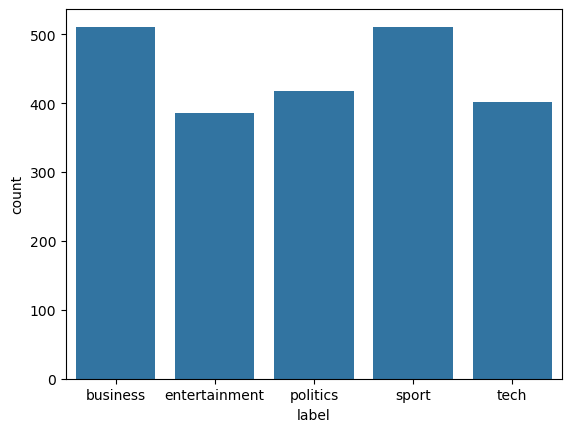

In [11]:
sns.countplot(df, x = 'label')

# About the data
Data consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005. Natural Classes: 5 (business, entertainment, politics, sport, tech)

# Identitfy Input and Output



In [12]:
y = df["label"]
X = df[["news_article"]]



In [13]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
X_train.head()

,news_article
1490,Cole refuses to blame van Persie\n\nAshley Col...
2001,Slimmer PlayStation triple sales\n\nSony PlayS...
1572,Bellamy fined after row\n\nNewcastle have fine...
1840,Finding new homes for old phones\n\nRe-using o...
610,Sundance to honour foreign films\n\nInternatio...


In [15]:
X_train.head()

,news_article
1490,Cole refuses to blame van Persie\n\nAshley Col...
2001,Slimmer PlayStation triple sales\n\nSony PlayS...
1572,Bellamy fined after row\n\nNewcastle have fine...
1840,Finding new homes for old phones\n\nRe-using o...
610,Sundance to honour foreign films\n\nInternatio...


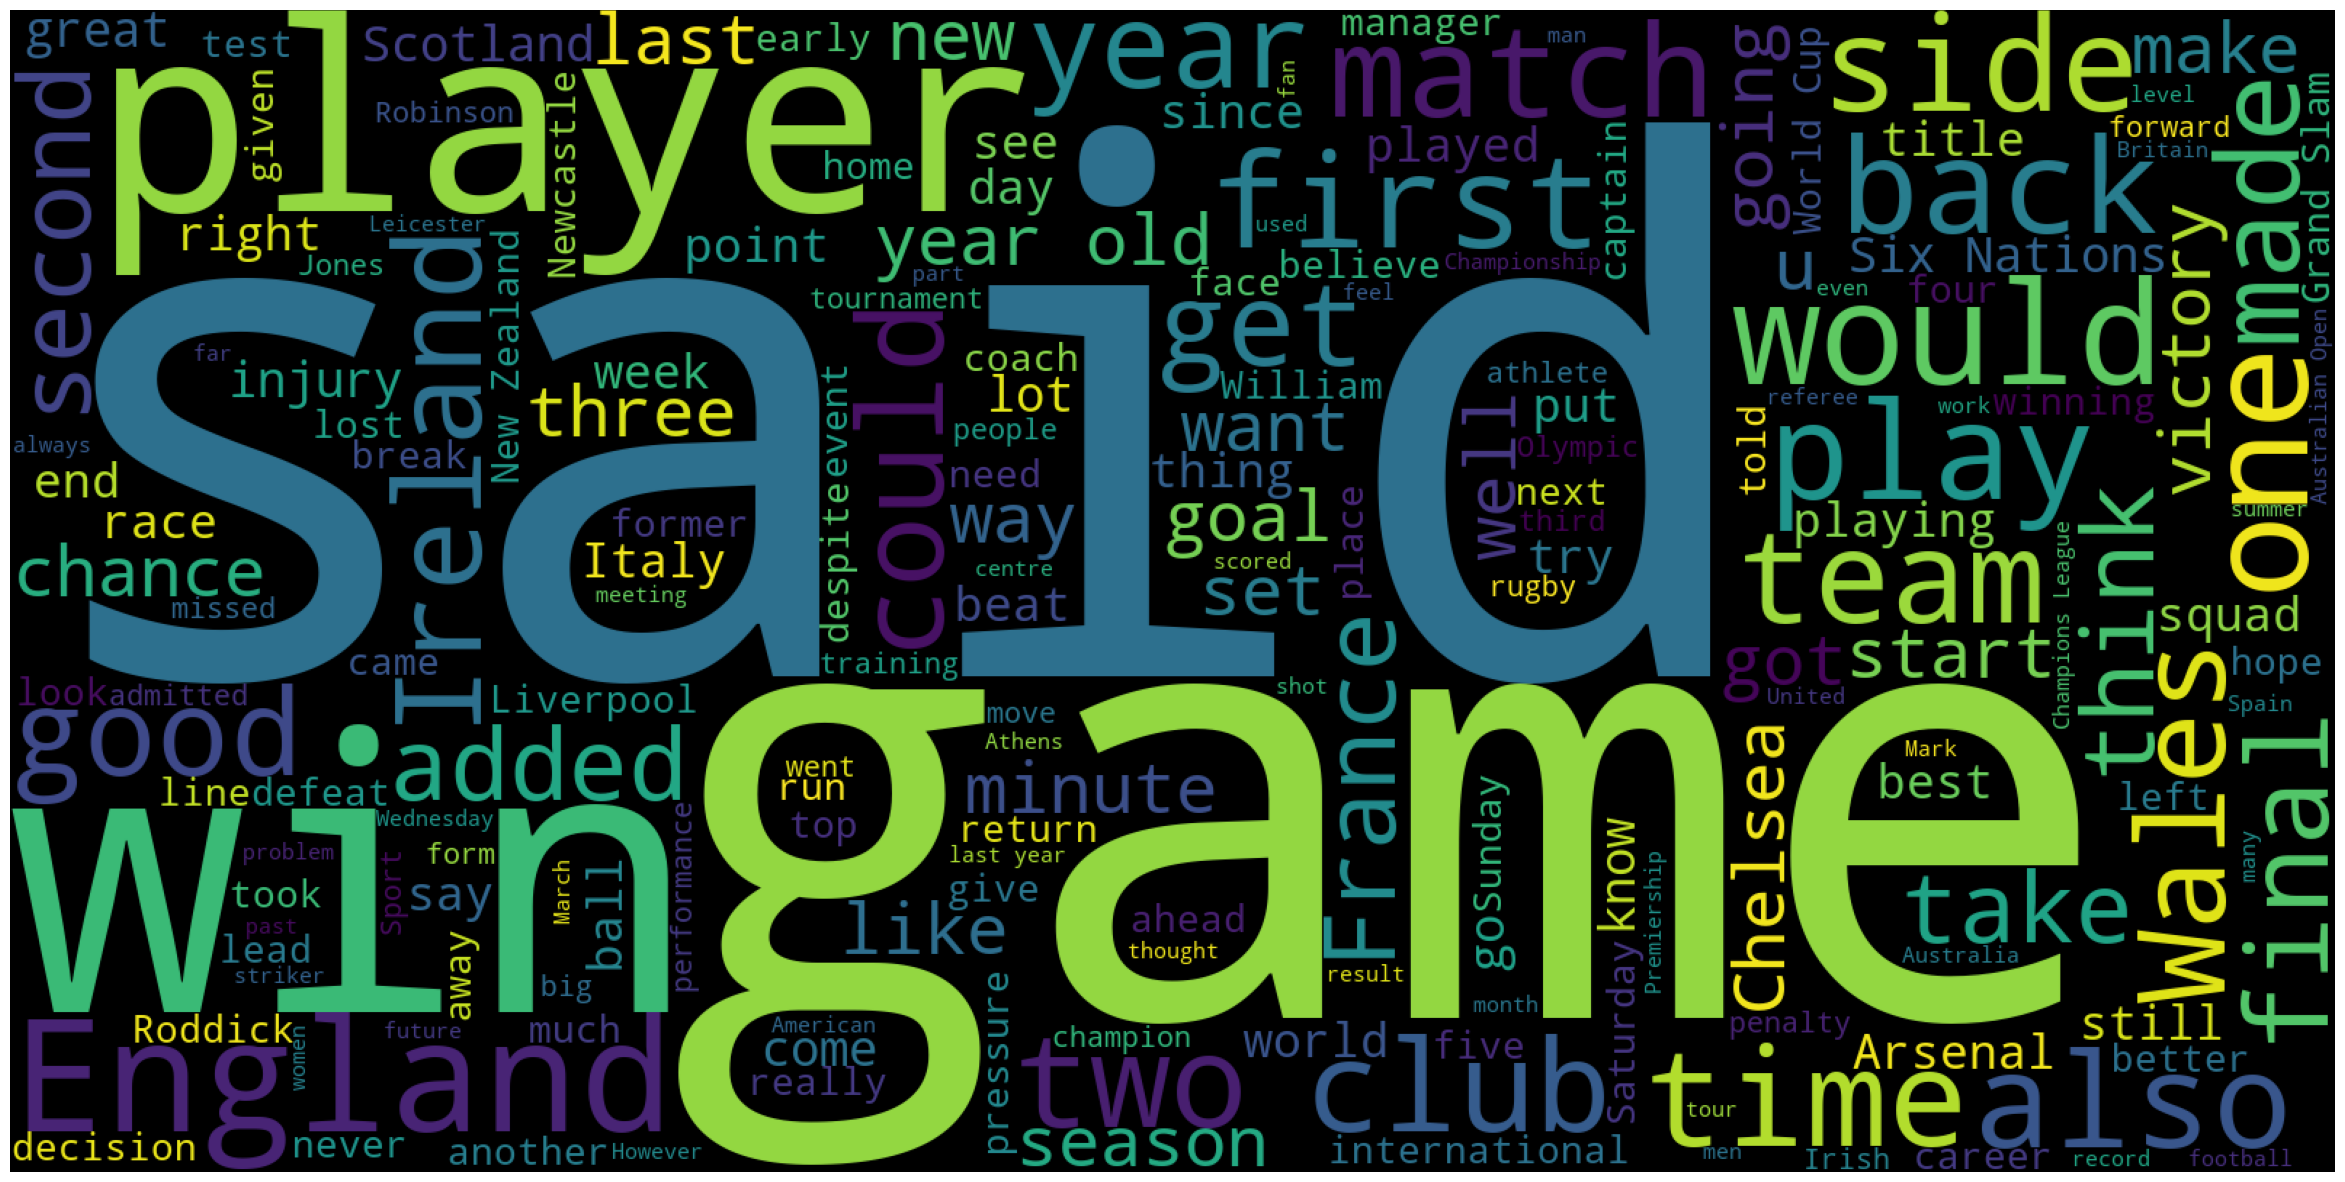

In [18]:
from wordcloud import WordCloud
# thư viện tạo hình ảnh đám mây , từ nào xuất hiện nhiều càng to và nổi bật
from nltk.corpus import stopwords
# stopwwords là các từ dừng, không cần thiết có trong văn bản

text = " ".join(X_train.loc[y_train == "sport", "news_article"])
# lấy toàn bộ bài báo có y_train = "sport" chọn cột newss_articel


word_cloud = WordCloud(stopwords = stopwords.words("english"),
                       background_color="black",
                       width=1600,
                       height = 800).generate(text)
plt.figure(1,figsize=(30,20))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

# Data Preparation -  Text Preprocessing



In [21]:
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
# Stemmer là cắt bỏ từ có thể mắt nghĩa
from nltk.stem import WordNetLemmatizer
# bỏ từ nhưng vẫm đủ nghĩa

## initial the inbuilt Stemmer
stemmer = PorterStemmer()
# wer can alsso user Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()


In [23]:
def preprocessing(raw_text, flag):
    #removing special characters and Digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lowercase

    sentence = sentence.lower() # chuyển lower()
    # remove stop words
    clean_tokens = [t for t in tokens if not it in stopwords.words("english")]

    # Stemming/ Lemmatization
    if flag =="stem":
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])
#pd.Series(["machine learning is fun", 4])
# Output:
# 0    machine learning is fun
# 1    4
# dtype: object